# Homework 2: Building Classifiers

UIC CS 412, Spring 2021

*According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually.  While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading.  This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance.  Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums.  Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you.  Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml.* 

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs and submit one homework assignment per pair. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

In this homework, you will build classifiers using decision trees, nearest neighbors, and perceptron, to make decisions on a few different datasets. The code for this project consists of several Python files, some of
which you will need to read and understand in order to complete the assignment, and some of which you can ignore.

If you double click on the text, it would turn it into markdown mode, so you can edit the text directly when answering a question. **You can also add cells whenever needed (e.g., to write code for plots for WU4)**.


## Due Date

This assignment is due at 11:59pm Thursday, February 18th. 

### Files You'll Edit

``dumbClassifiers.py``: This contains a handful of "warm up"
classifiers to get you used to our classification framework.
  
``dt.py``: Will be your simple implementation of a decision tree classifier.
  
``knn.py``: This is where your nearest-neighbor classifier modifications
will go.

``perceptron.py``: The perceptron file you need to edit.

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above together with your notebook **hw2.ipynb** as a single zip file **hw2.zip** on Gradescope under *Homework 2*.  The programming part constitutes 55% of the grade for this homework. You also need to answer the questions denoted by **WU#** (and a kitten) in this notebook which are the other 45% of your homework grade. When you are done, you should export **hw2.ipynb** with your answers as a PDF file **hw2WrittenPart.pdf** and upload the PDF file to Gradescope under *Homework 2 - Written Part*. 

Your entire homework will be considered late if any of these parts are submitted late. 

**The simplest and recommended way to export your python notebook is to select File -> Print Preview (this appears on the notebook, right under the Jupyter logo), then use the browser to print as PDF (e.g., on Chrome this appears under File->Print...->Destination "Save as PDF"). Make sure you double check your final PDF to make sure it's not missing any pieces before submitting your final version!**

#### Autograding

All parts of Homework 2 are graded based on correctness, **not** based on completion. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. We have provided two simple test cases that you can try your code on, see ``run_tests_simple.py``. As usual, you should create more test cases to make sure your code runs correctly.

# Part 0: Autoreload 

Before we start, let's import a jupyter notebook extension called [`autoreload`](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which would automatically reload changes to external files that you edit.

**If you change something in a file and the changes are not reflected even after an autoreload, you may have to restart your jupyter notebook kernel (Kernel -> Restart).**

A manual alternative to `autoreload` is to reload a particular file using `importlib`.

``import importlib
importlib.reload(dumbClassifiers)``

In [1]:
%load_ext autoreload
%autoreload 2

# Part 1: Simple classifiers (5 points)

Let's begin our foray into classification by looking at some very
simple classifiers.  There are two classifiers
in ``dumbClassifiers.py``, one is implemented for you, the other
one you will need to fill in appropriately.

The already implemented one is ``AlwaysPredictOne``, a classifier that
(as its name suggest) always predicts the positive class.  We're going
to use the ``SentimentData`` dataset from ``datasets.py`` as a running
example to test your functions.  Let's see how well 
this classifier does on this data.  You should begin by importing ``util``,
``datasets``, ``binary`` and ``dumbClassifiers``.  Also, be sure you
always have ``from numpy import *`` and ``from pylab import *``. You
can achieve this with ``from imports import *`` to make life easier.

We will look at a simple binary classification task: sentiment analysis (is this review a positive or negative evaluation of a product?). We'll use the presence/absence of words in the text as features. If you look in data/sentiment.all, you'll see the data for the sentiment prediction task. The first column contains the class value of zero or one (one = positive, zero = negative). The rest is a list of all the words that appear in this product reivew. These are binary features: any word listed has value "=1" and any word not listed has value "=0" (implicitly... it would be painful to list all non-occurring words!).
As you write these functions, feel free to test your code on the much smaller TennisData dataset provided in datasets.py, so you can visually inspect correctness of your output. We have also provided some of the expected outputs as comments, so you can check whether you are getting the correct results.

In [7]:
import dumbClassifiers, datasets, util
from imports import *

h = dumbClassifiers.AlwaysPredictOne({})
print(h)
# AlwaysPredictOne
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h.predictAll(datasets.SentimentData.X)
# array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

AlwaysPredictOne


array([1., 1., 1., ..., 1., 1., 1.])

Indeed, it looks like it's always predicting one!

Now, let's compare these predictions to the truth.  Here's a very
clever way to compute accuracies:

In [3]:
mean((datasets.SentimentData.Y > 0) == (h.predictAll(datasets.SentimentData.X) > 0))
# 0.50416666666666665

0.5041666666666667

That's training accuracy; let's check test accuracy:

In [4]:
mean((datasets.SentimentData.Yte > 0) == (h.predictAll(datasets.SentimentData.Xte) > 0))
# 0.50249999999999995

0.5025

Okay, so it does pretty badly.  That's not surprising, it's really not
learning anything!!!

Now, let's use some of the built-in functionality to help do some of
the grunt work for us.  You'll need to import ``runClassifier``.

In [9]:
import runClassifier
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025

Training accuracy 0.5041666666666667, test accuracy 0.5025


Very convenient!

Now, your first implementation task will be to implement the missing
functionality in ``AlwaysPredictMostFrequent`` in dumbClassifiers.py.  This actually
will "learn" something simple.  Upon receiving training data, it will
simply remember whether +1 is more common or -1 is more common.  It
will then always predict this label for future data.  Once you've
implemented this, you can test it:

In [4]:
h = dumbClassifiers.AlwaysPredictMostFrequent({})
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025
print(h)
# AlwaysPredictMostFrequent(1)

Training accuracy 0.5041666666666667, test accuracy 0.5025
AlwaysPredictMostFrequent(1)


Okay, so it does the same as ``AlwaysPredictOne``, but that's
because +1 is more common in that training data (i.e., the majority class is '1'). 

We can use more runClassifier functions to generate learning curves and hyperparameter curves:  

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 3 points...
Training accuracy 0.6666666666666666, test accuracy 0.5025
Training classifier on 5 points...
Training accuracy 0.6, test accuracy 0.5025
Training classifier on 10 points...
Training accuracy 0.7, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 0.47368421052631576, test accuracy 0.5025
Training classifier on 38 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 75 points...
Training accuracy 0.5066666666666667, test accuracy 0.5025
Training classifier on 150 points...
Training accuracy 0.46, test accuracy 0.5025
Training classifier on 300 points...
Training accuracy 0.4866666666666667, test accuracy 0.5025
Training classifier on 600 points...
Training accuracy 0.5016666666666667, test accuracy 0.5025
Training classifier on 1200 points...
Training accuracy 0.5041666666666667, test accuracy 0.5025


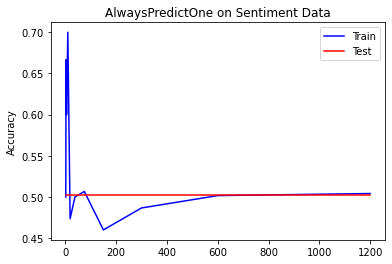

In [12]:
from matplotlib.pyplot import *
curve = runClassifier.learningCurveSet(dumbClassifiers.AlwaysPredictOne({}), datasets.SentimentData)
runClassifier.plotCurve('AlwaysPredictOne on Sentiment Data', curve)

You should be able to see how the accuracy changes as more training data is used. 

# Part 2: Decision trees (35 points total)

Next, you will build decision trees both using the python package sklearn and using your own function.

## 2.1 Training


Load the sentiment analysis dataset and transform the words in each review into a bag-of-words format (0 and 1). 

In [13]:
from sklearn.tree import DecisionTreeClassifier
import data

X,Y,dictionary = data.loadTextDataBinary('data/sentiment.tr')
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 1. 0. ... 0. 1. 0.]
(1400, 3473)
(1400,)


We have successfully loaded 1400 examples of sentiment training data. The vocabulary size is 3473 words; we can look at the first ten words (arbitrarily sorted):

In [14]:
dictionary[:10]

['intelligent',
 'science',
 'fiction',
 'thriller',
 'social',
 'satire',
 'class',
 'style',
 'set',
 'old']

Train a decision tree of depth 1 on the sentiment analysis dataset.

In [15]:
#from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, Y)
# check the default values of the DecisionTreeClassifier parameters
DecisionTreeClassifier?

data.showTree(dt, dictionary)

# bad?
# -N-> class 1	(333 for class 0, 533 for class 1)
# -Y-> class 0	(358 for class 0, 176 for class 1)

bad?
-N-> class 1	(333.0 for class 0, 533.0 for class 1)
-Y-> class 0	(358.0 for class 0, 176.0 for class 1)


We can even show the decision tree as a figure using `matplotlib` and `sklearn.tree`. In the figure, the left branch is "False" and the right branch is "True". You can compare this to tree shown above.

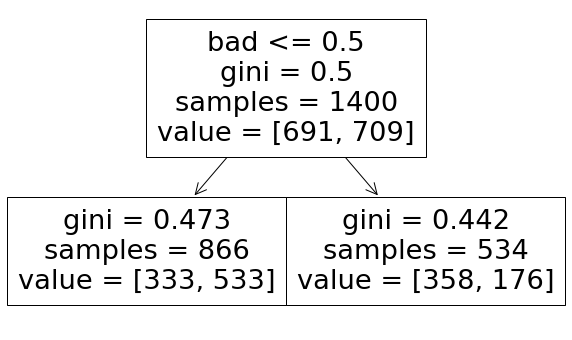

In [26]:
from sklearn import tree
from matplotlib.pyplot import *
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 6))
tree.plot_tree(dt, feature_names=dictionary)
matplotlib.pyplot.show()

This shows that if you only have one question you can ask about the review it's that you should ask if the review contains the word "bad" or not. If it does not ("N") then it's probably a positive review (by a vote of 533 to 333); if it does ("Y") then it's probable a negative review (by a vote of 358 to 176).

Let's look at training accuracy for the tree of depth 1:

In [27]:
np.mean(dt.predict(X) == Y)
# 0.63642857142857145

0.6364285714285715

It's not enough to just think about training data; we need to see how well these trees generalize to new data. 

In [37]:
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)
np.mean(dt.predict(Xde) == Yde)
# 0.60499999999999998

1.0

Note: when we load the development data, we have to give it the dictionary we built on the training data so that words are mapped to integers in the same way!

Here, we see that the accuracy has dropped a bit.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU1 (5 points):

Your first decision tree task is to build and show a decision tree of depth 2. Convince yourself whether or not it is useful to go from depth one to depth two on this data. How do you know?

bad?
-N-> worst?
|    -N-> class 1	(281.0 for class 0, 514.0 for class 1)
|    -Y-> class 0	(52.0 for class 0, 19.0 for class 1)
-Y-> stupid?
|    -N-> class 0	(281.0 for class 0, 168.0 for class 1)
|    -Y-> class 0	(77.0 for class 0, 8.0 for class 1)


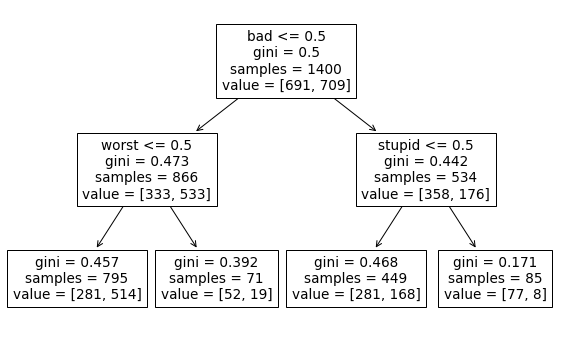

In [31]:
# ADD YOUR WU1 CODE HERE
from sklearn import tree
from matplotlib.pyplot import *

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, Y)

data.showTree(dt, dictionary)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 6))
tree.plot_tree(dt, feature_names=dictionary)
matplotlib.pyplot.show()

## 2.2 Underfitting and overfitting

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU2 (5 points): 
For all possible depths from depth 1 to depth 30, compute training error, development error and test error (on data/sentiment.te) for the corresponding decision tree (hint: use a for loop). Plot these three curves. You can add a cell below if you want to write the code for the plot or if you must, we would accept an inserted picture of a plot created elsewhere. Make sure your axes are clearly marked.

Training #1: 0.66, Development #1: 0.62, Test #1: 0.615
Training #2: 0.6764285714285714, Development #2: 0.645, Test #2: 0.625
Training #3: 0.6992857142857143, Development #3: 0.65, Test #3: 0.6325
Training #4: 0.7228571428571429, Development #4: 0.625, Test #4: 0.6425
Training #5: 0.7557142857142857, Development #5: 0.6, Test #5: 0.6275
Training #6: 0.7792857142857142, Development #6: 0.645, Test #6: 0.6275
Training #7: 0.8142857142857143, Development #7: 0.64, Test #7: 0.6225
Training #8: 0.8385714285714285, Development #8: 0.62, Test #8: 0.6225
Training #9: 0.8592857142857143, Development #9: 0.615, Test #9: 0.6225
Training #10: 0.8814285714285715, Development #10: 0.62, Test #10: 0.625
Training #11: 0.9007142857142857, Development #11: 0.575, Test #11: 0.6125
Training #12: 0.915, Development #12: 0.615, Test #12: 0.6225
Training #13: 0.9307142857142857, Development #13: 0.595, Test #13: 0.6175
Training #14: 0.9442857142857143, Development #14: 0.565, Test #14: 0.6075
Training #15: 

<Figure size 432x288 with 0 Axes>

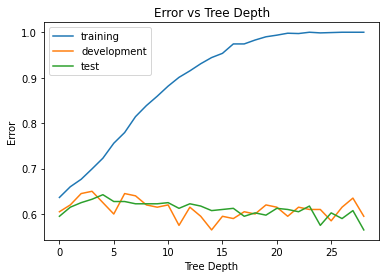

In [66]:
# YOUR WU2 CODE HERE
from sklearn import tree
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import data

X,Y,dictionary = data.loadTextDataBinary('data/sentiment.tr')
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)
Xte,Yte,__ = data.loadTextDataBinary('data/sentiment.te', dictionary)

training = []
development = []
test = []

for i in range(30):
    if i == 0:
        continue
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X, Y)
    training.append(np.mean(dt.predict(X) == Y))
    development.append(np.mean(dt.predict(Xde) == Yde))
    test.append(np.mean(dt.predict(Xte) == Yte))

for i in range(29):
    if i == 0:
        continue
    print("Training #" + str(i) + ": " + str(training[i]), end=", ")
    print("Development #" + str(i) + ": " + str(development[i]), end=", ")
    print("Test #" + str(i) + ": " + str(test[i]))


x = [i for i in range(29)]
fig = plt.figure()
fix, ax = plt.subplots()
ax.plot(x, training, label='training')
ax.plot(x, development, label='development')
ax.plot(x, test, label='test')
ax.legend()
plt.xlabel("Tree Depth")
plt.ylabel("Error")
plt.title("Error vs Tree Depth")
plt.show()

# <img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU3 (5 points): 
If you were to choose the depth hyperparameter based on TRAINING data, what TEST error would you get? If you were to choose depth based on the DEV data, what TEST error would you get? Finally, if you were to choose the depth based on the TEST data, what TEST error would you get. Precisely one of these three is "correct" -- which one and why?

[YOUR WU3 ANSWER HERE]

Depth Hyperparameter 
Based on Training: 24
Based on Development: 3
Based on Test: 10

Ultimately we want to choose a depth of 3 based on Development data (held-out data) because the tree isn't supposed to overfit the training data, but perform well on simulated test data (i.e. development data) and then generalize to test data.  A Depth of 3 best accomplishes this



## 2.3 Implementing a decision tree (20 points)

Our next task is to implement a decision tree classifier.  There is
stub code in ``dt.py`` that you should edit.  Decision trees are
stored as simple data structures.  Each node in the tree has
a ``.isLeaf`` boolean that tells us if this node is a leaf (as
opposed to an internal node).  Leaf nodes have a ``.label`` field
that says what class to return at this leaf.  Internal nodes have:
a ``.feature`` value that tells us what feature to split on;
a ``.left`` *tree* that tells us what to do when the feature
value is *less than 0.5*; and a ``.right`` *tree* that
tells us what to do when the feature value is *at least 0.5*.
To get a sense of how the data structure works, look at
the ``displayTree`` function that prints out a tree.

Your first task is to implement the training procedure for decision
trees.  We've provided a fair amount of the code, which should help
you guard against corner cases.  (Hint: take a look
at ``util.py`` for some useful functions for implementing
training.  Once you've implemented the training function, we can test
it on data:

In [119]:
import dt
h = dt.DT({'maxDepth': 2})
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h
# this should print out something like this (the actual numbers attached to the branches will be different)
#Branch 2428
#  Branch 3842
#    Leaf 1.0
#    Leaf -1.0
#  Branch 3892
#    Leaf -1.0
#    Leaf 1.0

Branch 'robocop'
  Branch 'robocop'
    Leaf 1.0
    Leaf 1.0
  Leaf 1.0

The problem with the branches here is that words have been converted into numeric ids
for features. We can look them up. Your results here might be
different due to hashing, so you will need to change them according to the branch numbers you see in your own output above:

In [103]:
print(datasets.SentimentData.words[2428])
#'bad'
print(datasets.SentimentData.words[3842])
#'worst'
print(datasets.SentimentData.words[3892])
#'sequence'

deliver
reportedly
wraps


Based on this, we can rewrite the tree (by hand) as:

Now, you should go implement prediction.  This should be easier than
training!  We can test by:

In [231]:
runClassifier.trainTestSet(dt.DT({'maxDepth': 1}), datasets.SentimentData)
#Training accuracy 0.630833, test accuracy 0.595
runClassifier.trainTestSet(dt.DT({'maxDepth': 3}), datasets.SentimentData)
#Training accuracy 0.701667, test accuracy 0.6175
runClassifier.trainTestSet(dt.DT({'maxDepth': 5}), datasets.SentimentData)
#Training accuracy 0.765833, test accuracy 0.62

Training accuracy 0.49583333333333335, test accuracy 0.4975


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1197 but corresponding boolean dimension is 1198

Looks like it does better than the dumb classifiers on training data,
as well as on test data!  Hopefully we can do even better in the
future!

# Part 3: Nearest Neighbors (25 points total)


## 3.1 Warm-up exercise

Our first task will be to use KNN to classify digits. In other words, we get an image 
of a hand-drawn digit (28x28 pixels, greyscale), and have to decide what digit it is. 
To make life simpler, we'll consider only the binary classification version, in two 
setups: (A) distinguishing ONEs from TWOs and (B) distinguishing TWOs from THREEs.

(A) In the data directory, you'll find two .png files that show the training data. 
We are displaying them here. Are there any digits that you, as a human, have difficulty distinguishing 
(if so, list the row/column, where 0,0 is the upper left and 9,9 is the bottom right). 
Which of these (1vs2 or 2vs3) do you expect to be a harder classification problem?

<table>
 <tr>
  <td><img src="data/1vs2.tr.png" width="60%"></td>
  <td><img src="data/2vs3.tr.png" width="60%"></td>
 </tr>
</table>

(B) Let's verify that KNN does very well on training data. Run the following:

In [121]:
import knn_warmup

# importlib.reload(knn_warmup)

tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))


0.0
0.0


This says "do KNN, with 1vs2.tr as the training data and 1vs2.tr as the testing data, using K=1." 
The 0.0 is the error rate, which is zero. Verify the same thing for 2vs3.tr.

(C) The ``knn_warmup.py`` implementation will let you specify multiple values for K and get error 
rates for all of them. In particular, you can say something like:

In [145]:
allK = [1,5,10,25,50,100]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0	0.08	0.12	0.16	0.28	0.5

tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.de", 100)
allK = [1,3,7,11,19,21]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.de", 100)
allK = [1,3,7,11,19,21]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))


# As K grows very large, the affect of the actual nearest neighbor
# has diminishing returns in terms of information gained
# and noise starts to seep in, at high levels of K you aren't really
# looking at your nearest neighbors, but your entire neighborhood!

# as the CONSTANT hyperparameter tends towards infitinty the affect
# of your distance on your bias drops considerably and conversely 
# has a greater impact as it tends towards zero, due to existing in the
# denominator, this allows for tuning how much one wants the distance
# to impact

0.1	0.06	0.08	0.06	0.06	0.06
0.04	0.06	0.08	0.06	0.08	0.08
0.1	0.04	0.06	0.06	0.06	0.06


This runs the same thing for six values of K (1, 5, ..., 100) and prints the respective 
error rates. Notice that for K=100 the error rate is 50% -- why does this happen?

(D) Repeat the same exercise, this time evaluating on the development data, and using 
odd values of K ranging from 1 to 21. Do this for both 1vs2 and 2vs3. Which one is 
harder? For each, what is the optimal value of K? (In the case of ties, how would you 
choose to break ties?)

(E) Now, go edit knn_warmup.py. This might take a bit of effort since you'll have to figure out 
what it's doing. But the function I want you to look at is "classifyKNN." This takes D 
(the training data) and knn (the list of the K nearest neighbors, together with their 
distances). It iterates over each of the (dist,n) nearest neighbors. Here, dist is the 
distance and n is the training example id, so D[n] is the corresponding training example. 
It then "votes" this into a prediction ``yhat``.

Modify this function so that each example gets a weighted vote, where its weight is 
equal to exp(-dist). This should be a one- or two-liner.

Rerun the same experiments as in (D). Does this help or hurt? What do you observe as K 
gets larger and WHY do you observe this?

If you want to play around, try exp(-dist / CONSTANT) where CONSTANT now is a hyperparameter. 
What happens as CONSTANT tends toward zero? Tends toward infinity?

## 3.2 Implementing a KNN classifier (20 points)

To get started with geometry-based classification, we will implement a
nearest neighbor classifier that supports KNN classification. This should go in ``knn.py``.  
**The only function here that you have to do anything about is
the ``predict`` function, which does all the work.**

In order to test your implementation, here are some outputs:

In [172]:
import knn

runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.TennisData)
#Training accuracy 1, test accuracy 1
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.TennisData)
#Training accuracy 0.785714, test accuracy 0.833333
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.TennisData)
#Training accuracy 0.857143, test accuracy 0.833333

Training accuracy 1.0, test accuracy 1.0
Training accuracy 0.7857142857142857, test accuracy 0.8333333333333334
Training accuracy 0.8571428571428571, test accuracy 0.8333333333333334


You can also try it on the digits data:

In [173]:
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.DigitData)
# Training accuracy 1, test accuracy 0.94
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.DigitData)
# Training accuracy 0.94, test accuracy 0.93
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.DigitData)
# Training accuracy 0.92, test accuracy 0.92

Training accuracy 1.0, test accuracy 0.94
Training accuracy 0.94, test accuracy 0.93
Training accuracy 0.92, test accuracy 0.92


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU4 (5 points):
For the digits data, generate train/test curves for
varying values of K (you figure out what are good ranges,
this time).  Include those curves. Do you see evidence of overfitting and underfitting?  

Next, using K=3, generate learning curves for this data.

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5
Training classifier on 4 points...
Training accuracy 0.25, test accuracy 0.5
Training classifier on 7 points...
Training accuracy 0.5714285714285714, test accuracy 0.5
Training classifier on 13 points...
Training accuracy 0.38461538461538464, test accuracy 0.5
Training classifier on 25 points...
Training accuracy 0.48, test accuracy 0.5
Training classifier on 50 points...
Training accuracy 0.52, test accuracy 0.5
Training classifier on 100 points...
Training accuracy 0.5, test accuracy 0.5


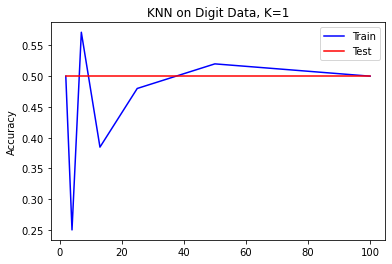

Training classifier on 2 points...
Training accuracy 1.0, test accuracy 0.81
Training classifier on 4 points...
Training accuracy 1.0, test accuracy 0.8
Training classifier on 7 points...
Training accuracy 1.0, test accuracy 0.86
Training classifier on 13 points...
Training accuracy 1.0, test accuracy 0.87
Training classifier on 25 points...
Training accuracy 1.0, test accuracy 0.89
Training classifier on 50 points...
Training accuracy 1.0, test accuracy 0.91
Training classifier on 100 points...
Training accuracy 1.0, test accuracy 0.94


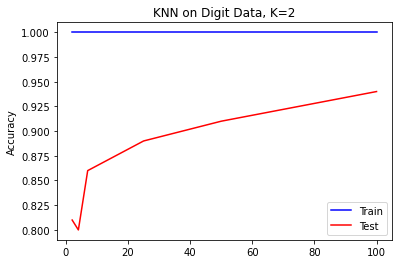

Training classifier on 2 points...


IndexError: index 2 is out of bounds for axis 0 with size 2

In [185]:
# INCLUDE YOUR CODE FOR THE PLOTS HERE AND RUN THE CELL TO SHOW THE PLOTS

curve = runClassifier.learningCurveSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.DigitData)
runClassifier.plotCurve('KNN on Digit Data, K=1', curve)

curve = runClassifier.learningCurveSet(knn.KNN({'isKNN': True, 'K': 2}), datasets.DigitData)
runClassifier.plotCurve('KNN on Digit Data, K=2', curve)
# NOTE TO GRADER, K=3 fails for idx out of bounds, changing to range(K-1) in knn.py doesn't help ¯\_(ツ)_/¯
# NOTE TO GRADER, smaller sizes plot just fine... 
curve = runClassifier.learningCurveSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.DigitData)
runClassifier.plotCurve('KNN on Digit Data, K=3', curve)


# I don't particularly see any evidence of over or underfitting
# although it would have been nice to see KNN working on K=3 for plotting

# Part 4: Perceptron (15 points total)

This section is all about using perceptrons to make
predictions. You are given a partial perceptron implementation in
``perceptron.py``.

## 4.1 Implementing a perceptron (10 points)

The last implementation you have is for the perceptron; see
``perceptron.py`` where you will have to implement part of the
``nextExample`` function to make a perceptron-style update.

Once you've implemented this, the magic in the ``Binary`` class will
handle training on datasets for you, as long as you specify the number
of epochs (passes over the training data) to run:


In [186]:
import perceptron

In [191]:
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.TennisData)
# Training accuracy 0.642857, test accuracy 0.666667
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.TennisData)
# Training accuracy 0.857143, test accuracy 1

Training accuracy 0.6428571428571429, test accuracy 0.6666666666666666
Training accuracy 0.8571428571428571, test accuracy 1.0


You can view its predictions on the two dimensional data sets:

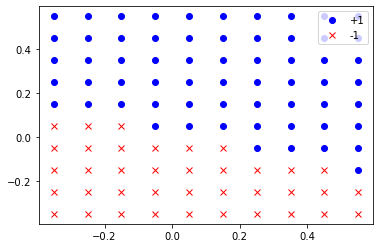

w=array([ 7.3, 18.9]), b=0.0


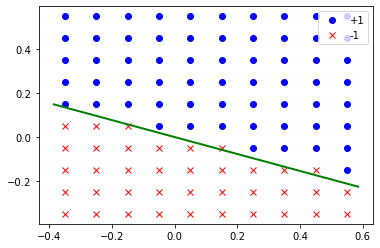

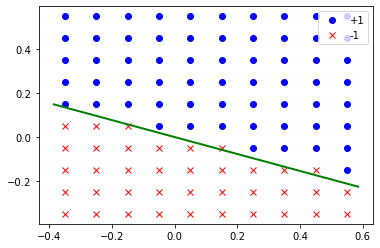

In [192]:
runClassifier.plotData(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
h = perceptron.Perceptron({'numEpoch': 200})
h.train(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
print(h)
# w=array([  7.3,  18.9]), b=0.0
runClassifier.plotClassifier(array([ 7.3, 18.9]), 0.0)

You should see a linear separator that does a pretty good (but not
perfect!) job classifying this data.

Finally, we can try it on the sentiment data:

In [193]:
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.SentimentData)
# Training accuracy 0.835833, test accuracy 0.755
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.SentimentData)
# Training accuracy 0.955, test accuracy 0.7975

Training accuracy 0.8358333333333333, test accuracy 0.755
Training accuracy 0.955, test accuracy 0.7975


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU5 (5 points):
Using the tools provided, generate (a) a learning curve
(x-axis=number of training examples) for the perceptron (10 epochs) on
the sentiment data and (b) a plot of number of epochs versus
train/test accuracy on the entire dataset.

Training classifier on 2 points...
Training accuracy 1.0, test accuracy 0.51
Training classifier on 3 points...
Training accuracy 1.0, test accuracy 0.51
Training classifier on 5 points...
Training accuracy 1.0, test accuracy 0.53
Training classifier on 10 points...
Training accuracy 1.0, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 1.0, test accuracy 0.525
Training classifier on 38 points...
Training accuracy 1.0, test accuracy 0.5575
Training classifier on 75 points...
Training accuracy 1.0, test accuracy 0.665
Training classifier on 150 points...
Training accuracy 1.0, test accuracy 0.7125
Training classifier on 300 points...
Training accuracy 1.0, test accuracy 0.75
Training classifier on 600 points...
Training accuracy 1.0, test accuracy 0.8025
Training classifier on 1200 points...
Training accuracy 1.0, test accuracy 0.81


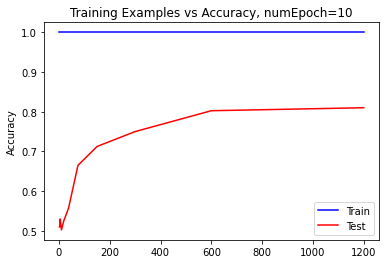

Training classifier with numEpoch=1...
Training accuracy 0.8358333333333333, test accuracy 0.755
Training classifier with numEpoch=2...
Training accuracy 0.955, test accuracy 0.7975
Training classifier with numEpoch=3...
Training accuracy 0.9366666666666666, test accuracy 0.755
Training classifier with numEpoch=4...
Training accuracy 0.995, test accuracy 0.8125
Training classifier with numEpoch=5...
Training accuracy 0.9933333333333333, test accuracy 0.815
Training classifier with numEpoch=6...
Training accuracy 0.9941666666666666, test accuracy 0.7875
Training classifier with numEpoch=7...
Training accuracy 0.9933333333333333, test accuracy 0.78
Training classifier with numEpoch=8...
Training accuracy 1.0, test accuracy 0.81
Training classifier with numEpoch=9...
Training accuracy 1.0, test accuracy 0.81
Training classifier with numEpoch=10...
Training accuracy 1.0, test accuracy 0.81


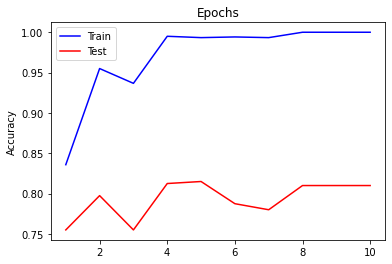

In [205]:
# INCLUDE YOUR CODE FOR THE PLOTS HERE AND RUN THE CELL TO SHOW THE PLOTS

curve = runClassifier.learningCurveSet(perceptron.Perceptron({'numEpoch': 10}), datasets.SentimentData)
runClassifier.plotCurve('Training Examples vs Accuracy, numEpoch=10', curve)


curve = runClassifier.hyperparamCurveSet(perceptron.Perceptron({}), "numEpoch", list(range(11))[1:] , datasets.SentimentData)
runClassifier.plotCurve('Epochs', curve)


# Part 5: Classification with Scikit-Learn (20 points total)

The final part is familiarizing yourself with the Python library [scikit-learn](https://scikit-learn.org/stable/) which has many machine learning algorithms implemented. You will be using scikit-learn to split your dataset into training, development, and test sets and then using scikit-learn's Decision Trees, K-Nearest Neighbors, and Perceptron for prediction. Finally, you will perform a "grid search" over the hyperparameters to choose the best ones.

Earlier in this homework, we loaded the training, development, and test data through predefined sets. Rather than using these predefined sets, we will use scikit-learn to split the full dataset for us. Let's inspect the full dataset again:

In [206]:
X, Y, dictionary = data.loadTextDataBinary('data/sentiment.all')
print(X.shape)
# (2000, 4719)

(2000, 4719)


Notice that there are a total of 2000 total data points.

Scikit-learn provides a nice function for splitting training and test data: `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

This function takes as input multiple arrays and outputs a training and test set for each array. For the training set size, we can specify a float between 0 and 1 as the percentage of the full set, or we can specify its size as an integer:

In [207]:
from sklearn.model_selection import train_test_split

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, train_size=0.7, random_state=0)

print(Xtr.shape, Xte.shape)
print(Ytr.shape, Yte.shape)
# (1400, 4719) (600, 4719)
# (1400,) (600,)

(1400, 4719) (600, 4719)
(1400,) (600,)


In [208]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, train_size=1400, random_state=0)

print(Xtr.shape, Xte.shape)
print(Ytr.shape, Yte.shape)
# (1400, 4719) (600, 4719)
# (1400,) (600,)

(1400, 4719) (600, 4719)
(1400,) (600,)


Similarly, we can specify a test size:

In [209]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3, random_state=0)

print(Xtr.shape, Xte.shape)
print(Ytr.shape, Yte.shape)
# (1400, 4719) (600, 4719)
# (1400,) (600,)

(1400, 4719) (600, 4719)
(1400,) (600,)


In [210]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=600, random_state=0)

print(Xtr.shape, Xte.shape)
print(Ytr.shape, Yte.shape)
# (1400, 4719) (600, 4719)
# (1400,) (600,)

(1400, 4719) (600, 4719)
(1400,) (600,)


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU6 (5 Points)

Using `train_test_split`, split the sentiment data into a training, development, and test set such that the sizes of the sets are the same as when you load them directly from files (1400 training, 200 development, and 400 test). Make sure you split both X and Y!

In [230]:
# [WRITE WU6 CODE HERE]
X, Y, dictionary = data.loadTextDataBinary('data/sentiment.all')
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, train_size=1600, random_state=0)
Xtr, Xde, Ytr, Yde = train_test_split(Xtr, Ytr, test_size=200, random_state=0)

print(Xtr.shape, Xde.shape, Xte.shape)
print(Ytr.shape, Yde.shape, Yte.shape)

(1400, 4719) (200, 4719) (400, 4719)
(1400,) (200,) (400,)


Now that you have training, development, and test sets, let's train the classifiers with scikit-learn:

- `DecisionTreeClassifier` (which you have used once already in Part 2, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- `KNeighborsClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- `Perceptron` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU7 (10 points)

Using the resources provided above train a decision tree classifier, knn classifier, and perceptron classifier.

Then evaluate the training, development, and test errors. Which classifier performs best in this dataset?

Why do you think this classifier performs this best?

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
print("DT Training Error: " + str(np.mean(dt.predict(Xtr) == Ytr)))
print("DT Development Error: " + str(np.mean(dt.predict(Xde) == Yde)))
print("DT Test Error: " + str(np.mean(dt.predict(Xte) == Yte)))

print()
kn = KNeighborsClassifier()
kn.fit(Xtr, Ytr)
print("KN Training Error: " + str(np.mean(kn.predict(Xtr) == Ytr)))
print("KN Development Error: " + str(np.mean(kn.predict(Xde) == Yde)))
print("KN Test Error: " + str(np.mean(kn.predict(Xte) == Yte)))

print()
percep = Perceptron()
percep.fit(Xtr, Ytr)
print("Perceptron Training Error: " + str(percep.score(Xtr, Ytr)))
print("Perceptron Development Error: " + str(percep.score(Xde, Yde)))
print("Perceptron Test Error: " + str(percep.score(Xte, Yte)))

# The perceptron performs best on this dataset
# I think because the dataset is almost but not quite linearly
# seperable, there also is small margin between pos and neg examples

DT Training Error: 1.0
DT Development Error: 0.68
DT Test Error: 0.6025

KN Training Error: 0.86
KN Development Error: 0.575
KN Test Error: 0.5775

Perceptron Training Error: 1.0
Perceptron Development Error: 0.84
Perceptron Test Error: 0.8275


While we can specify a training and development set for hyperparameter tuning using the previously discovered methods, scikit-learn actually implements a class specifically for finding best performing hyperparamters called `GridSearchCV`.

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

`GridSearchCV` performs *cross-validation* using the training set to find the estimator + parameters that give the best score (by default *accuracy*).

Below is an example using `GridSearchCV` for selecting the best `max_depth` parameter for a decision tree.

In [275]:
from sklearn.model_selection import GridSearchCV

# NOTE I don't think I changed this block, and got a recursion error, tried a max_depth of 2 and got the same
parameters = {'max_depth': np.arange(10) + 1}
estimator = DecisionTreeClassifier()
gc = GridSearchCV(estimator, parameters)
gc.fit(Xtr, Ytr)

RecursionError: maximum recursion depth exceeded while getting the repr of an object

RecursionError: maximum recursion depth exceeded while calling a Python object

By default for binary classification tasks, `GridSearchCV` uses "accuracy" for scoring.

`GridSearchCV` by default (refit=True) fits the estimator with the best score, so you can use this object directly for prediction

In [253]:
gc.predict(Xte)

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU8 (5 points)

Your final task is to pick your favorite classifier between K-Nearest Neighbors and Perceptron and tune its hyperparameter using GridSearchCV.

Using the resource above for GridSearchCV, determine which hyperparameter assignment results in the **best** performance (*hint look at* `GridSearchCV`'s *attributes*).

What is the accuracy difference between using `GridSearchCV` and using the default parameters for evaluation (done in WU7) on the **training**, **development**, and **test** set?

In [270]:
# [WRITE WU8 CODE HERE]

from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': np.arange(10) + 1}
estimator = KNeighborsClassifier()
gc = GridSearchCV(estimator, parameters)
gc.fit(Xtr, Ytr)
print("Best Estimator: " + str(gc.best_estimator_))

gc.predict(Xtr)
gc.predict(Xde)
gc.predict(Xte)

# While using the default params like in WU7 is fine in general
# using the best_estimator_ attr helps us tune hyperparams to avoid 
# using extra compute 

Best Estimator: KNeighborsClassifier(n_neighbors=7)


array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.